### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#Check for null values in dataset
print(data.isnull().sum())
#It seems 'car' column is nearly full of null values and may not add any value to the analysis. Taking stock of total nulls in 'car'
len(data['car'])
data.info()
#Formatting the 'age' column to numericalize it so that it can be formulaically accessed later on.
data['age'].value_counts()
data['age'] = data['age'].str.replace("50plus","50")
data['age'] = data['age'].str.replace("below21","18")
data['age'] = data['age'].astype('float')
#Cleaing up the bar column next


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  -----

In [5]:
#Now getting a sense of fields in each column and if there's a logical grouping that might be applied
print(data['destination'].value_counts())
print(data['passanger'].value_counts())
print(data['weather'].value_counts())
print(data['temperature'].value_counts())




No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
80    6528
55    3840
30    2316
Name: temperature, dtype: int64


In [6]:
print(data['time'].value_counts())
print(data['coupon'].value_counts())
print(data['expiration'].value_counts())
print(data['maritalStatus'].value_counts())
print(data['education'].value_counts())
print(data['occupation'].value_counts())

#It is annoying to see the spelling mistake in 'passanger' so I will fix it first.
#data.rename(columns = {'passanger' : 'passenger'})
#It also seems that columns 'coupon' and 'expiration' yield a unique field when combined - that of coupons for each location and its time to expiry.

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
1d    7091
2h    5593
Name: expiration, dtype: int64
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64
Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Educ

In [7]:
#Performing similar sanitisation of the 'Bar' column in order to make it fully numerical and easy to access formulaically.
data['Bar'].value_counts()
data['Bar'] = data['Bar'].str.replace("never","0")
data['Bar'] = data['Bar'].str.replace("less1","1")
data['Bar'] = data['Bar'].str.replace("1~3","3")
data['Bar'] = data['Bar'].str.replace("4~8","8")
data['Bar'] = data['Bar'].str.replace("gt8","100000")
data['Bar'] = pd.to_numeric(data['Bar'])


3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
#Removing 'car' column and reviewing new data
data = data.drop('car', axis = 1)
data.isnull().sum()
#Removing nas from the remainder of the dataframe
data = data.dropna()
data.head(2)
data.info()
data.describe()
#It seems the remainder of the data is workable from this point forward, going by the results of 'data.describe()'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   destination           12079 non-null  object 
 1   passanger             12079 non-null  object 
 2   weather               12079 non-null  object 
 3   temperature           12079 non-null  int64  
 4   time                  12079 non-null  object 
 5   coupon                12079 non-null  object 
 6   expiration            12079 non-null  object 
 7   gender                12079 non-null  object 
 8   age                   12079 non-null  float64
 9   maritalStatus         12079 non-null  object 
 10  has_children          12079 non-null  int64  
 11  education             12079 non-null  object 
 12  occupation            12079 non-null  object 
 13  income                12079 non-null  object 
 14  Bar                   12079 non-null  float64
 15  CoffeeHouse       

,temperature,age,has_children,Bar,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12079.000000,12079.000000,12079.000000,12079.000000,12079.0,12079.000000,12079.000000,12079.000000,12079.000000,12079.000000
mean,63.334713,32.313519,0.408478,2708.745426,1.0,0.561222,0.119381,0.215167,0.784833,0.569335
std,19.133246,10.336641,0.491573,16229.673044,0.0,0.496258,0.324249,0.410955,0.410955,0.495190
min,30.000000,18.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,21.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,31.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,41.000000,1.000000,3.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,50.000000,1.000000,100000.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


4. What proportion of the total observations chose to accept the coupon? 



(array([5202.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        6877.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

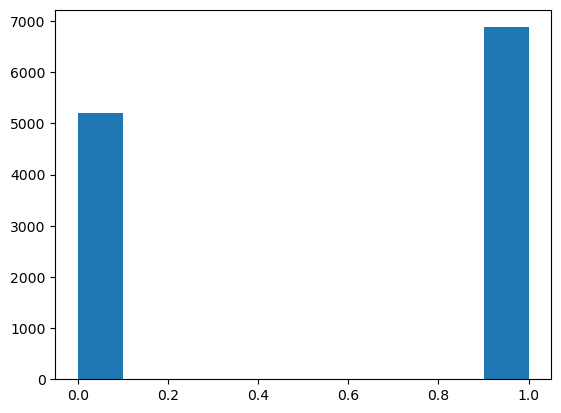

In [9]:
#Since the column 'Y' consists solely of boolean values, a simple mean would represent the % of individuals accepting the coupon (sum of yes/sum of all booleans)
data['Y'].mean()
plt.hist(data['Y'])

5. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Restaurant(<20)'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

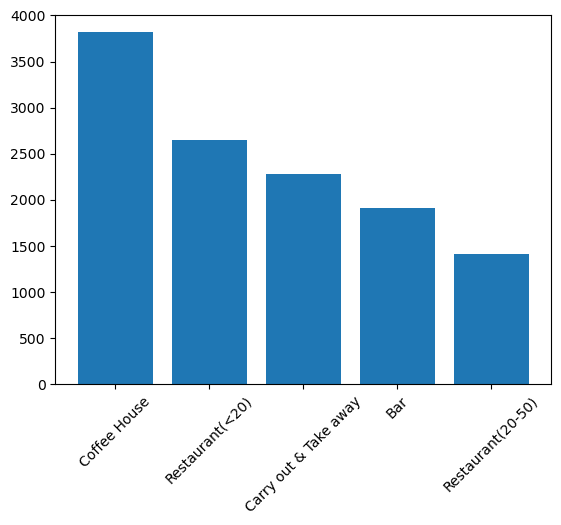

In [10]:
coupon_bar = pd.DataFrame(data['coupon'].value_counts())
plt.bar(x = coupon_bar.index, height = coupon_bar['coupon'])
plt.xticks(rotation = 45)

6. Use a histogram to visualize the temperature column.

(array([2195.,    0.,    0.,    0.,    0., 3662.,    0.,    0.,    0.,
        6222.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

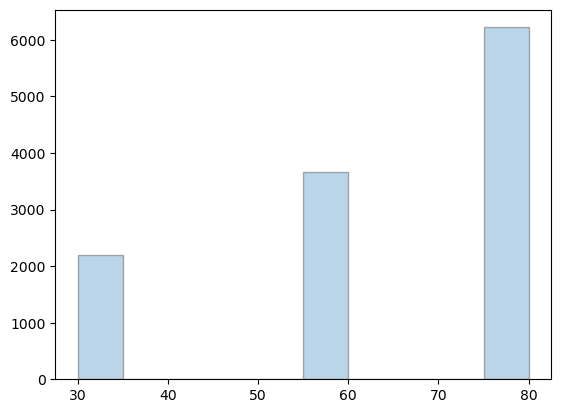

In [11]:
plt.hist(data['temperature'], edgecolor = 'Black', alpha = 0.3)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
data_bar = data[data['coupon'].str.contains('Bar')]

2. What proportion of bar coupons were accepted?


In [13]:
bar_cpn_accept_rate = data_bar['Y'].mean()
print(bar_cpn_accept_rate)

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
data_bar_3less = data_bar.query("Bar <= 3")['Y'].mean()
print(data_bar_3less)
data_bar_more3 = data_bar.query("Bar > 3")['Y'].mean()
print(data_bar_more3)
#Display actual data grid
print(data_bar.groupby('Bar')[['Y']].value_counts())
#bar_3orfewer = sum(data_bar.query("Bar == '1~3'")['Y']) + sum(data_bar.query("Bar == 'less1'")['Y']) + sum(data_bar.query("Bar == 'never'")['Y'])
#print(tot_bar_accept)
#print(bar_3orfewer)
#bar_3orfewer/tot_bar_accept
print(f'Acceptance rate of those who went to a bar <=3 times is {data_bar_3less}, compared to acceptance rate of {data_bar_more3} for those who went more than 3 times. In other words the acceptance rate of those who went to a bar <=3 times is {data_bar_3less/data_bar_more3} times that of those who went > 3 times')
    

0.37267441860465117
0.7616580310880829
Bar       Y
0.0       0    639
          1    149
1.0       0    306
          1    247
3.0       1    245
          0    134
8.0       1    114
          0     33
100000.0  1     33
          0     13
dtype: int64
Acceptance rate of those who went to a bar <=3 times is 0.37267441860465117, compared to acceptance rate of 0.7616580310880829 for those who went more than 3 times. In other words the acceptance rate of those who went to a bar <=3 times is 0.48929362442651475 times that of those who went > 3 times


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
#print(data_bar['Bar'].value_counts())
print(data_bar.groupby(['Bar', 'age'])[['Y']].value_counts())
data_bar_more1_25plus = data_bar.query("Bar > 1" and "age >= 26")['Y'].mean()
print(data_bar_more1_25plus)
print(f'Acceptance rate of those who goto a bar >1 a month and are over age of 25 is {data_bar_more1_25plus} and is quite comparable to all others which is {bar_cpn_accept_rate}')

#bar_more1_25plus_accept = sum(data_bar.query("Bar == '1~3'" and "age >= 26")['Y'])
#+ sum(data_bar.query("Bar == '4~8'" and "age >= 26")['Y'])
#+ sum(data_bar.query("Bar == 'gt8'" and "age >= 26")['Y'])
#bar_more1_25plus_tot = data_bar.query("Bar == '1~3'" and "age >= 26")['Y'].value_counts()
#bar_more1_25plus_tot


Bar       age   Y
0.0       18.0  0     35
                1     24
          21.0  0    105
                1     29
          26.0  0    109
                    ... 
100000.0  26.0  1     15
                0      3
          31.0  0      6
                1      3
          50.0  1      3
Length: 71, dtype: int64
0.38606271777003487
Acceptance rate of those who goto a bar >1 a month and are over age of 25 is 0.38606271777003487 and is quite comparable to all others which is 0.41191845269210664


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
#print(data_bar['occupation'].value_counts())
#print(data_bar['passanger'].value_counts())
ans5 = data_bar.query("Bar > 1" and "passanger != 'Kid(s)'" and "occupation != 'Farming Fishing & Forestry'")['Y'].mean()
print(ans5)
#Question is not clear - it asks to compare but doesn't state clearly what should I be comparing to.

0.4117647058823529


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [17]:
#Performing similar sanitisation exercise we did above for the 'Bar' column to enable numerical and formulaic access
# to the restaurant<20 column.

#data_bar['income'].value_counts()
#data_bar['RestaurantLessThan20'].value_counts()
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace("never","0")
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace("less1","1")
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace("1~3","3")
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace("4~8","8")
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].str.replace("gt8","100000")
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].astype('float')

In [18]:
ans6_a = data_bar.query("Bar > 1" and "passanger != 'Kid(s)'" and "maritalStatus != 'Widowed'")['Y'].mean()
ans6_b = data_bar.query("Bar > 1" and "age <= 31")['Y'].mean()
ans6_c = data_bar.query("RestaurantLessThan20 > 3" and "income == '$25000 - $37499'" or "income == '$37500 - $49999'" or "income == 'Less than $12500'")['Y'].mean()
print(ans6_a)
print(ans6_b)
print(ans6_c)

0.4119198312236287
0.45726495726495725
0.4533333333333333


Text(0.5, 1.0, 'Acceptance for bar coupons')

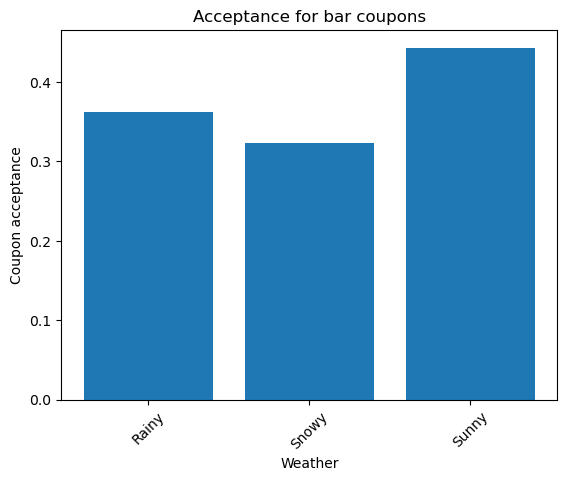

In [19]:
#Some additional charting of data:
data_bar_weather = data_bar.groupby('weather')['Y'].mean().reset_index()
plt.bar(data_bar_weather['weather'], data_bar_weather['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Weather')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

Text(0.5, 1.0, 'Acceptance for bar coupons')

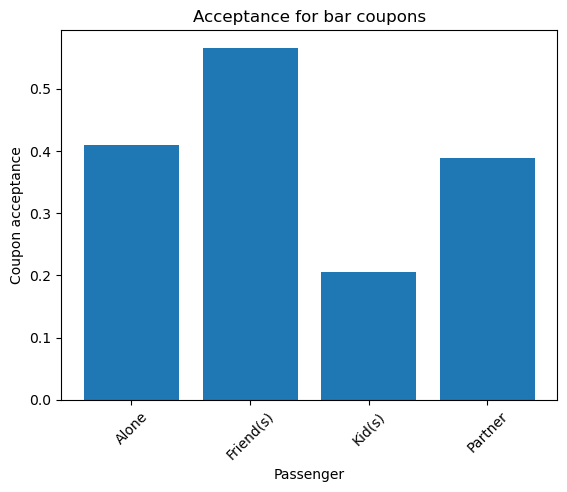

In [20]:
data_bar_pngr = data_bar.groupby('passanger')['Y'].mean().reset_index()
plt.bar(data_bar_pngr['passanger'], data_bar_pngr['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Passenger')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

Text(0.5, 1.0, 'Acceptance for bar coupons')

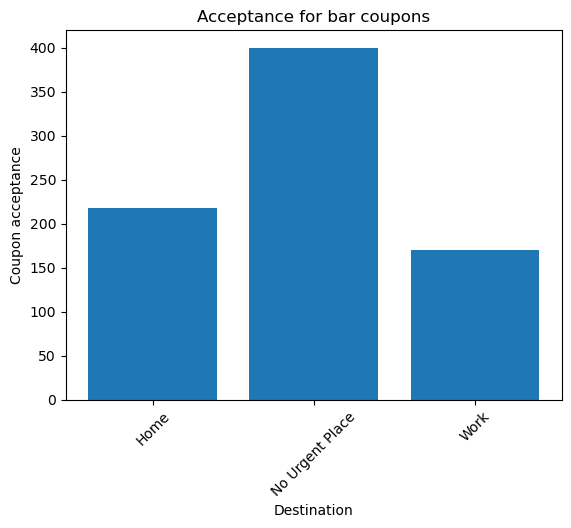

In [21]:
data_bar_destsum = data_bar.groupby('destination')['Y'].sum().reset_index()
plt.bar(data_bar_destsum['destination'], data_bar_destsum['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Destination')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

Text(0.5, 1.0, 'Acceptance for bar coupons')

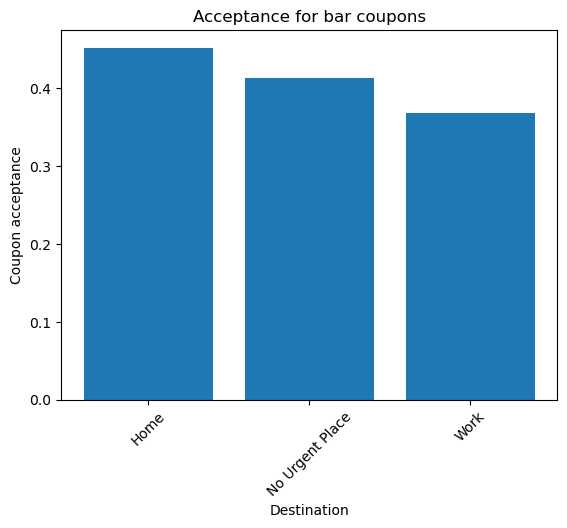

In [22]:
data_bar_dest = data_bar.groupby('destination')['Y'].mean().reset_index()
plt.bar(data_bar_dest['destination'], data_bar_dest['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Destination')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

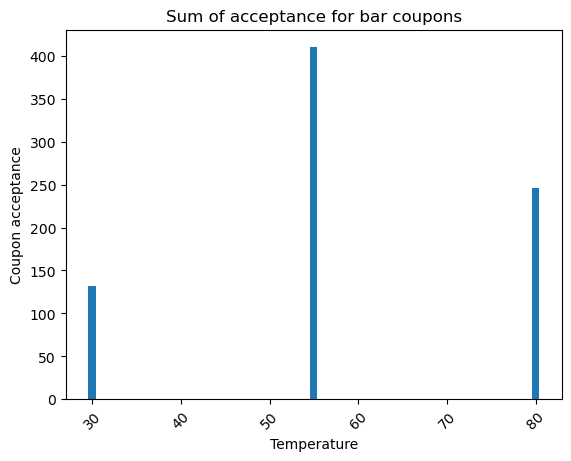

In [23]:
data_bar_temp = data_bar.groupby('temperature')['Y'].sum().reset_index()
plt.bar(data_bar_temp['temperature'], data_bar_temp['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Temperature')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

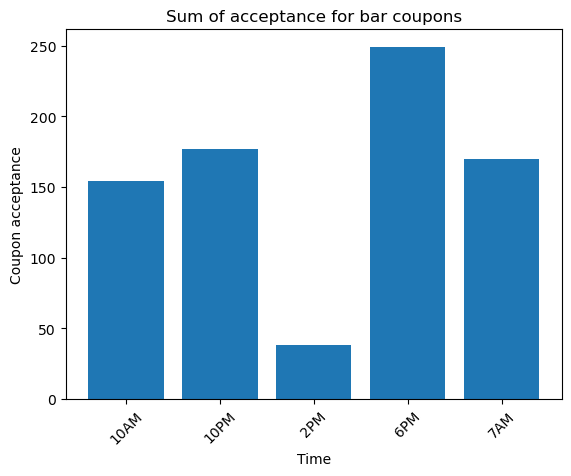

In [24]:
data_bar_time = data_bar.groupby('time')['Y'].sum().reset_index()
plt.bar(data_bar_time['time'], data_bar_time['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Acceptance for bar coupons')

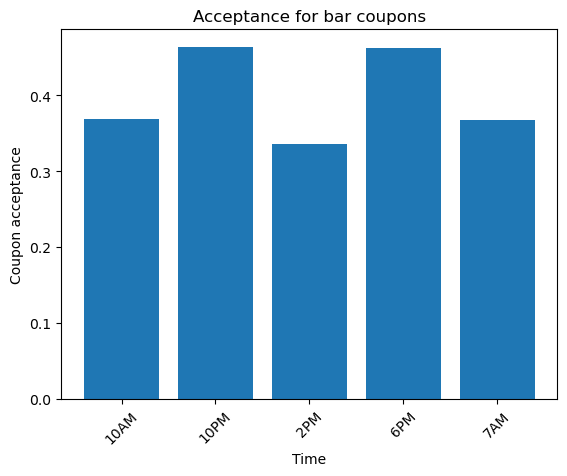

In [25]:
data_bar_timerate = data_bar.groupby('time')['Y'].mean().reset_index()
plt.bar(data_bar_timerate['time'], data_bar_timerate['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

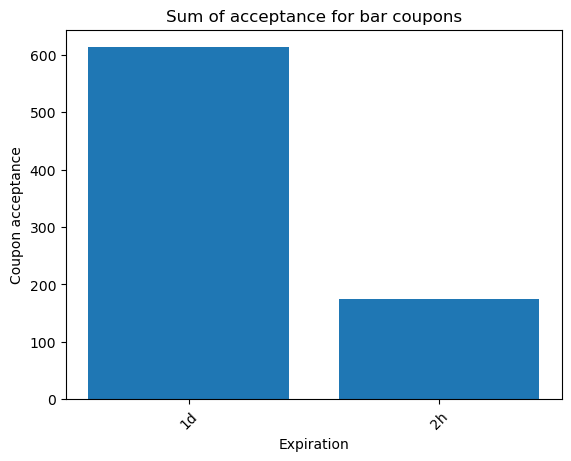

In [26]:
data_bar_exp = data_bar.groupby('expiration')['Y'].sum().reset_index()
plt.bar(data_bar_exp['expiration'], data_bar_exp['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Expiration')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Acceptance for bar coupons')

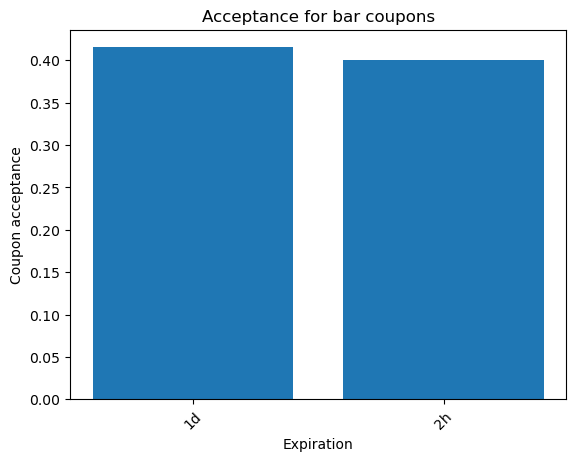

In [27]:
data_bar_exprate = data_bar.groupby('expiration')['Y'].mean().reset_index()
plt.bar(data_bar_exprate['expiration'], data_bar_exprate['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Expiration')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

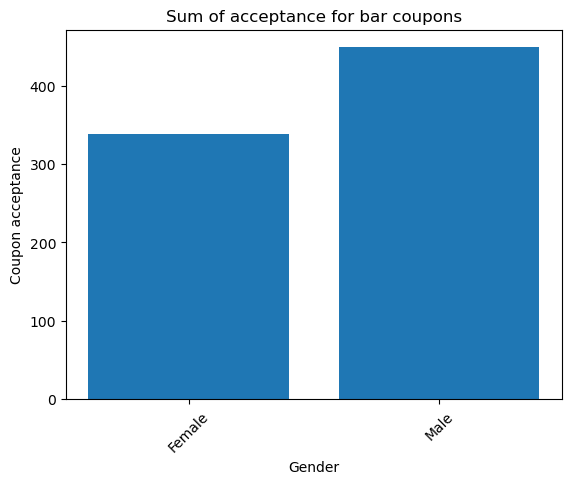

In [28]:
data_bar_gndr = data_bar.groupby('gender')['Y'].sum().reset_index()
plt.bar(data_bar_gndr['gender'], data_bar_gndr['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Gender')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

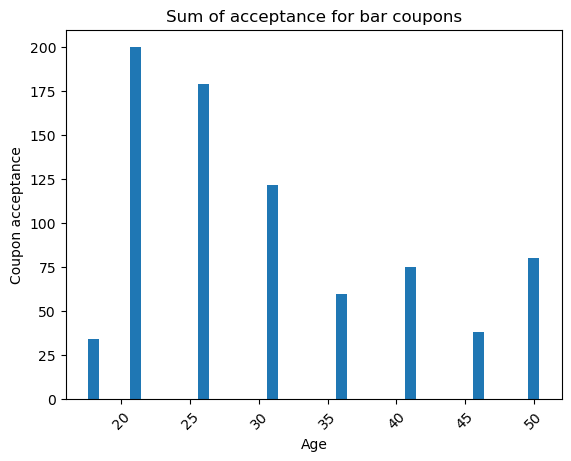

In [29]:
data_bar_age = data_bar.groupby('age')['Y'].sum().reset_index()
plt.bar(data_bar_age['age'], data_bar_age['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Age')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

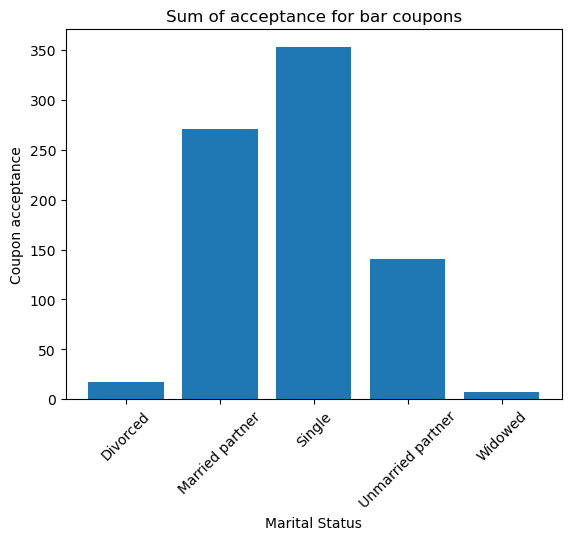

In [30]:
data_bar_ms = data_bar.groupby('maritalStatus')['Y'].sum().reset_index()
plt.bar(data_bar_ms['maritalStatus'], data_bar_ms['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Marital Status')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

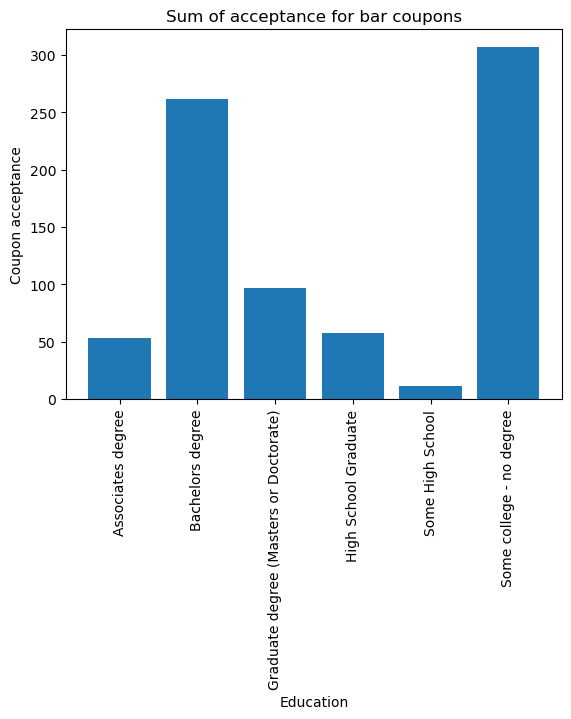

In [31]:
data_bar_edu = data_bar.groupby('education')['Y'].sum().reset_index()
plt.bar(data_bar_edu['education'], data_bar_edu['Y'])
plt.xticks(rotation = 90)
plt.xlabel('Education')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Sum of acceptance for bar coupons')

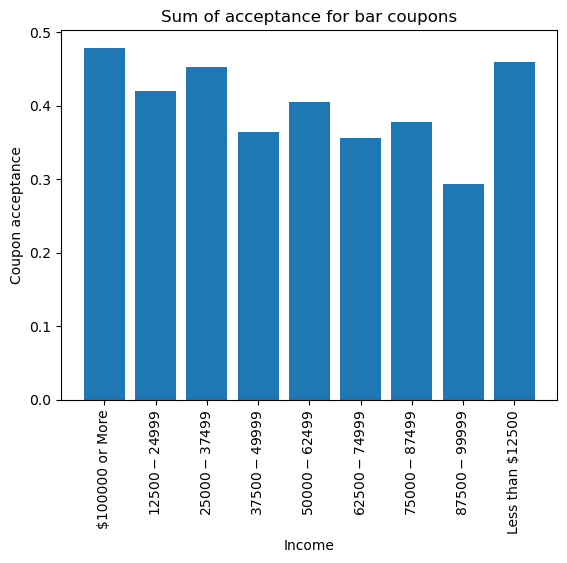

In [32]:
data_bar_inc = data_bar.groupby('income')['Y'].mean().reset_index()
plt.bar(data_bar_inc['income'], data_bar_inc['Y'])
plt.xticks(rotation = 90)
plt.xlabel('Income')
plt.ylabel('Coupon acceptance')
plt.title('Sum of acceptance for bar coupons')

Text(0.5, 1.0, 'Acceptance for bar coupons')

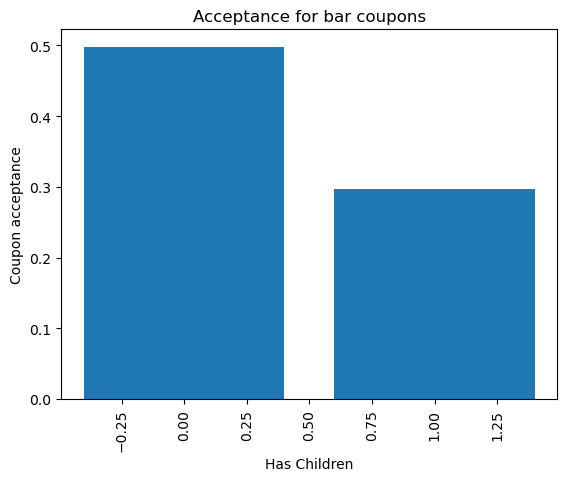

In [33]:
data_bar_kids = data_bar.groupby('has_children')['Y'].mean().reset_index()
plt.bar(data_bar_kids['has_children'], data_bar_kids['Y'])
plt.xticks(rotation = 90)
plt.xlabel('Has Children')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for bar coupons')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [34]:
#I analyzed the data both ways: for sum of acceptance within each category and mean acceptance rate in each category.
#Drivers who frequent bars more than 3 times a month tend to accept the bar coupons more often.
#Drivers with no kids tend to accept coupons more often
#Drivers in younger age groups tend to accept coupons more often
#Drivers with no urgent destination tend to accept coupons more often
#Drivers in evening and late hours tend to accept coupons more often
#Sunny days and pleasant temperatures are conducive to coupon acceptance

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [35]:
#I have decided to analyze the cheaper restaurant coupon acceptance
data_rest20 = data[data['coupon'].str.contains('<20')]
data_rest20.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21.0,Single,...,less1,4~8,8.0,less1,1,0,0,0,1,1
29,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,21.0,Single,...,less1,4~8,8.0,less1,1,1,0,0,1,1


Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

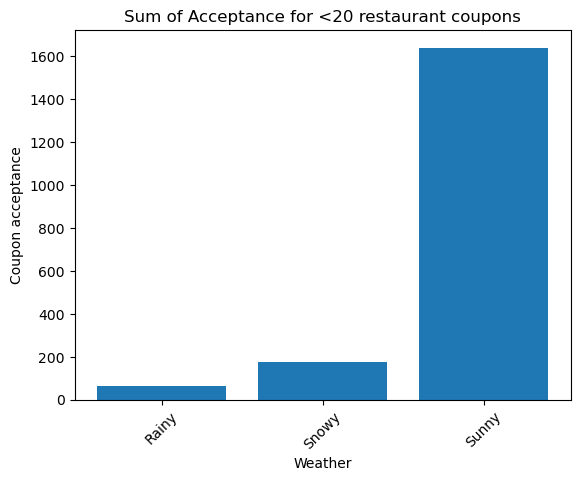

In [36]:
data_rest20_weather = data_rest20.groupby('weather')['Y'].sum().reset_index()
plt.bar(data_rest20_weather['weather'], data_rest20_weather['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Weather')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

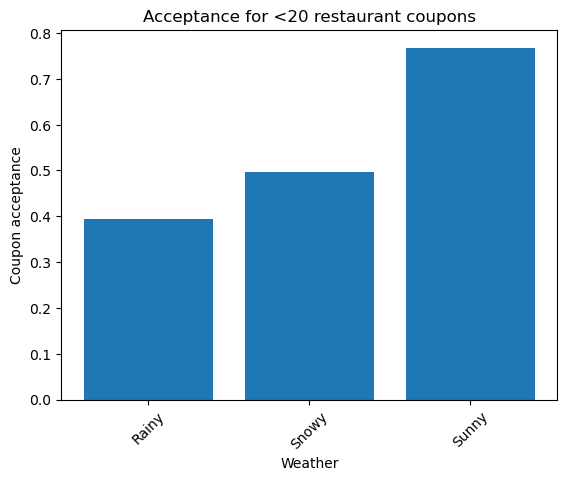

In [37]:
data_rest20_weathermean = data_rest20.groupby('weather')['Y'].mean().reset_index()
plt.bar(data_rest20_weathermean['weather'], data_rest20_weathermean['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Weather')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

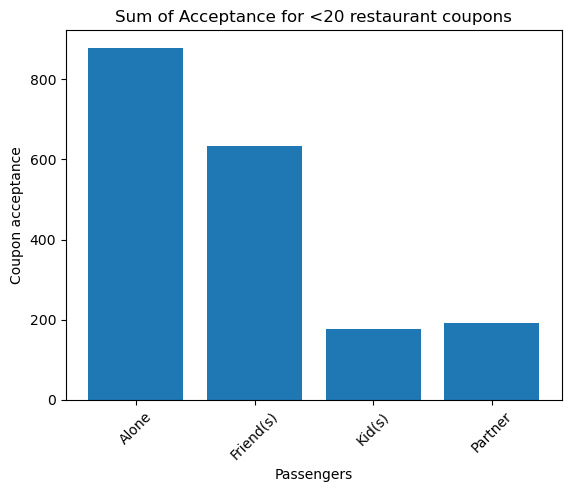

In [38]:
data_rest20_pass = data_rest20.groupby('passanger')['Y'].sum().reset_index()
plt.bar(data_rest20_pass['passanger'], data_rest20_pass['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Passengers')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

In [39]:
#Here's a rough check of the count of coupons distributed in each category. Effectively the acceptance rate is what matters
# not the total coupons picked, in order to have a fair representation of acceptance across categories.
#data_rest20_pass = data_rest20.groupby('passanger').count().reset_index()
#plt.bar(data_rest20_pass['passanger'], data_rest20_pass['Y'])
#plt.xticks(rotation = 45)
#plt.xlabel('Passengers')
#plt.ylabel('Coupon acceptance')
#plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

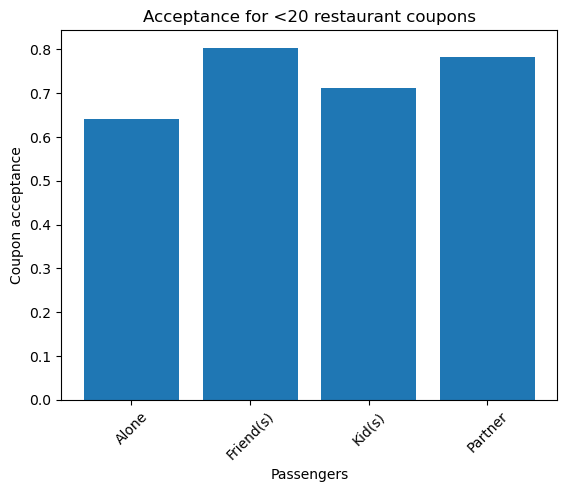

In [40]:
data_rest20_passm = data_rest20.groupby('passanger')['Y'].mean().reset_index()
plt.bar(data_rest20_passm['passanger'], data_rest20_passm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Passengers')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

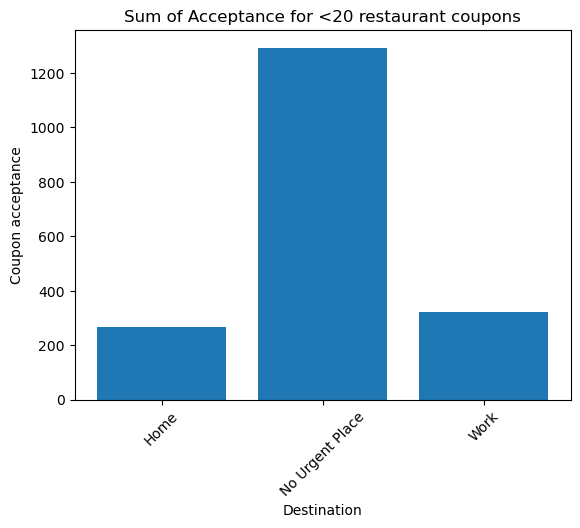

In [41]:
data_rest20_dest = data_rest20.groupby('destination')['Y'].sum().reset_index()
plt.bar(data_rest20_dest['destination'], data_rest20_dest['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Destination')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

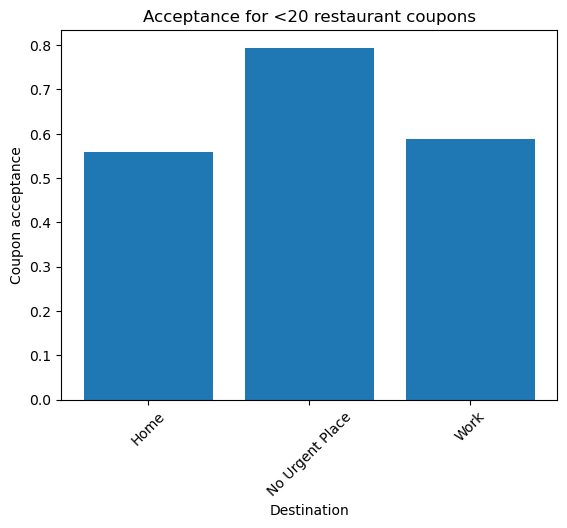

In [42]:
data_rest20_destm = data_rest20.groupby('destination')['Y'].mean().reset_index()
plt.bar(data_rest20_destm['destination'], data_rest20_destm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Destination')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

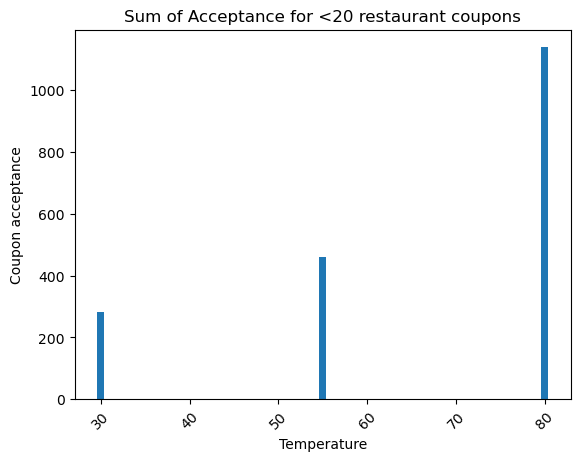

In [43]:
data_rest20_temp = data_rest20.groupby('temperature')['Y'].sum().reset_index()
plt.bar(data_rest20_temp['temperature'], data_rest20_temp['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Temperature')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

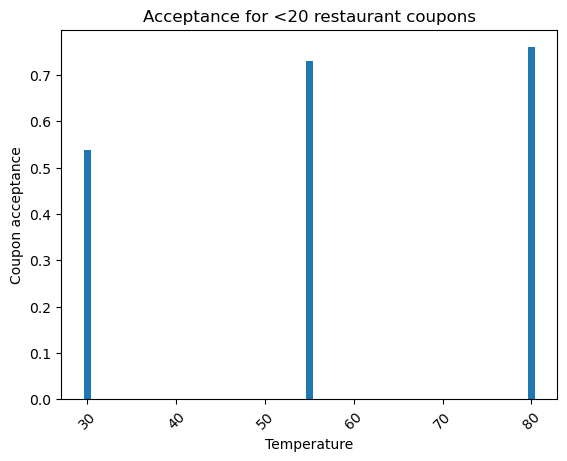

In [44]:
data_rest20_tempm = data_rest20.groupby('temperature')['Y'].mean().reset_index()
plt.bar(data_rest20_tempm['temperature'], data_rest20_tempm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Temperature')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

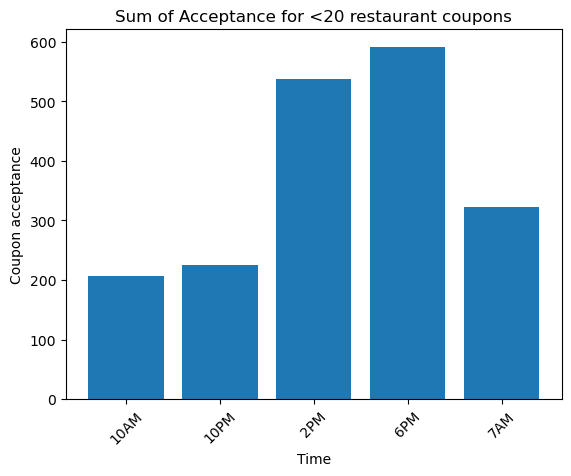

In [45]:
data_rest20_time = data_rest20.groupby('time')['Y'].sum().reset_index()
plt.bar(data_rest20_time['time'], data_rest20_time['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

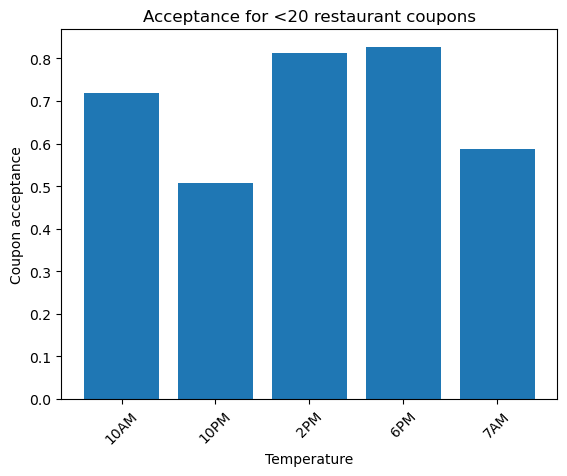

In [46]:
data_rest20_timem= data_rest20.groupby('time')['Y'].mean().reset_index()
plt.bar(data_rest20_timem['time'], data_rest20_timem['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Temperature')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

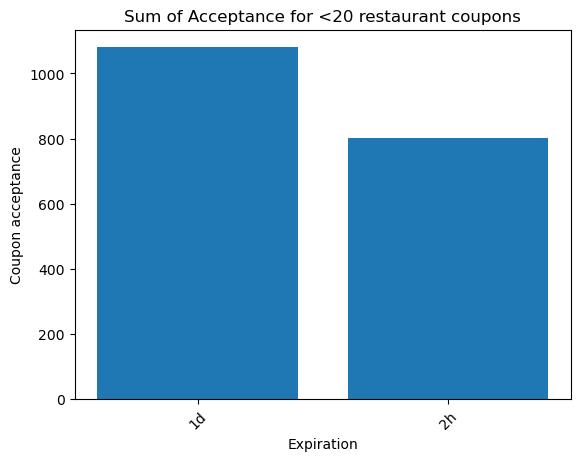

In [47]:
data_rest20_exp = data_rest20.groupby('expiration')['Y'].sum().reset_index()
plt.bar(data_rest20_exp['expiration'], data_rest20_exp['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Expiration')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

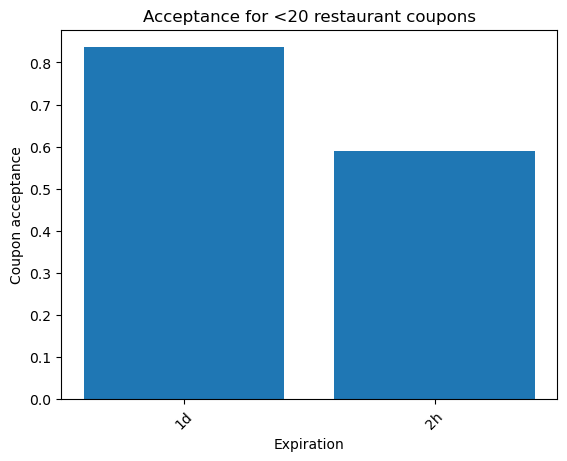

In [48]:
data_rest20_expm = data_rest20.groupby('expiration')['Y'].mean().reset_index()
plt.bar(data_rest20_expm['expiration'], data_rest20_expm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Expiration')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

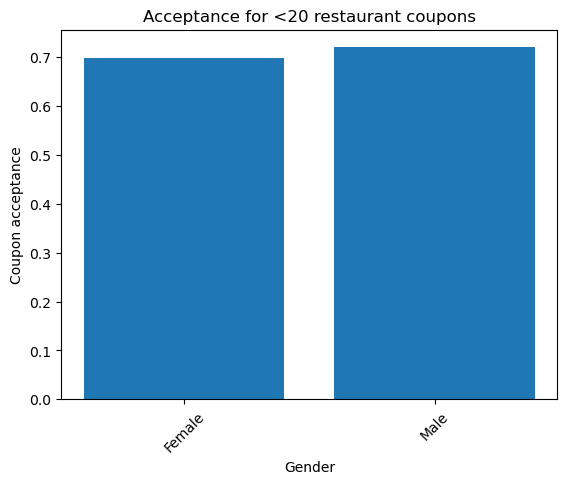

In [49]:
data_rest20_gendm = data_rest20.groupby('gender')['Y'].mean().reset_index()
plt.bar(data_rest20_gendm['gender'], data_rest20_gendm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Gender')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

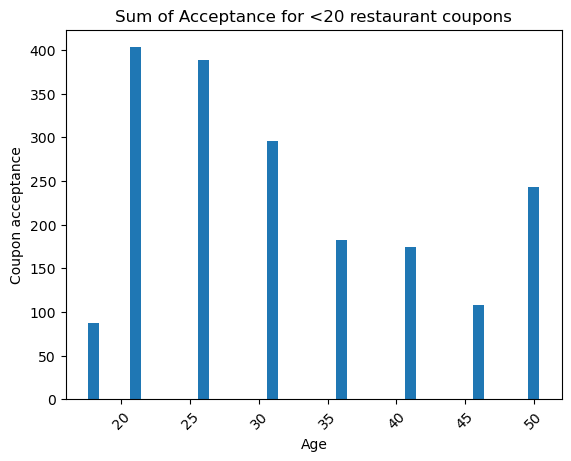

In [50]:
data_rest20_age = data_rest20.groupby('age')['Y'].sum().reset_index()
plt.bar(data_rest20_age['age'], data_rest20_age['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Age')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

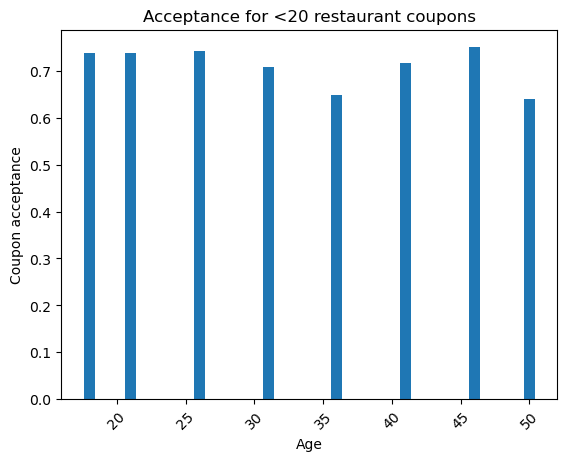

In [51]:
data_rest20_agem = data_rest20.groupby('age')['Y'].mean().reset_index()
plt.bar(data_rest20_agem['age'], data_rest20_agem['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Age')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

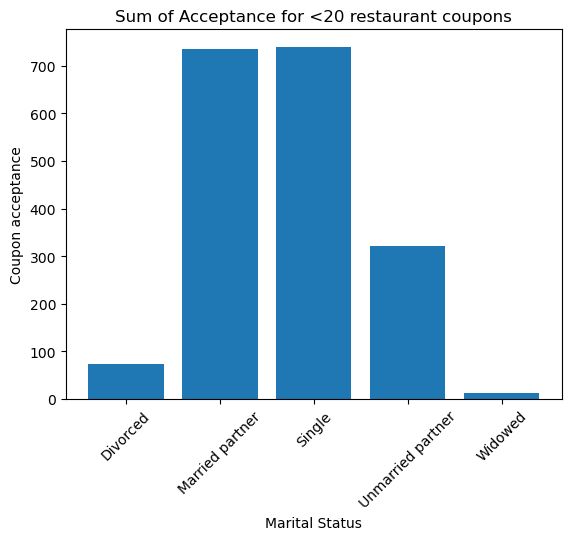

In [52]:
data_rest20_ms = data_rest20.groupby('maritalStatus')['Y'].sum().reset_index()
plt.bar(data_rest20_ms['maritalStatus'], data_rest20_ms['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Marital Status')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

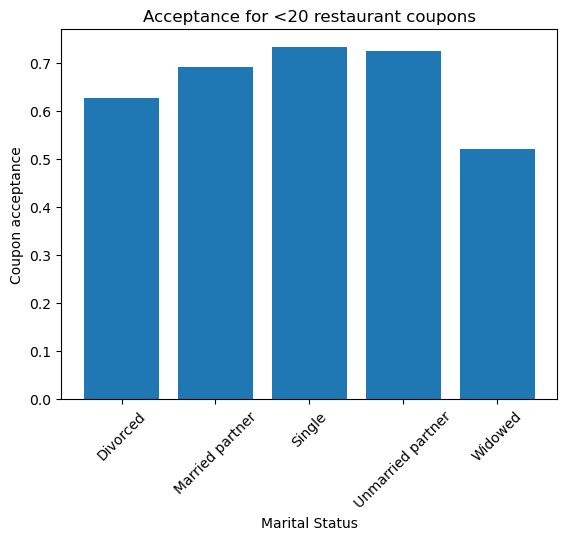

In [53]:
data_rest20_msm = data_rest20.groupby('maritalStatus')['Y'].mean().reset_index()
plt.bar(data_rest20_msm['maritalStatus'], data_rest20_msm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Marital Status')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

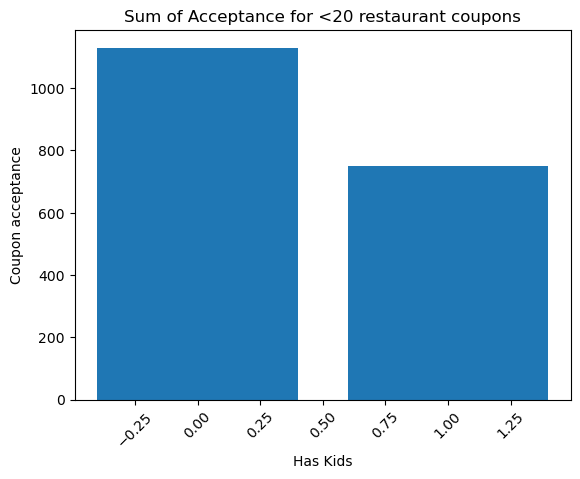

In [54]:
data_rest20_kids = data_rest20.groupby('has_children')['Y'].sum().reset_index()
plt.bar(data_rest20_kids['has_children'], data_rest20_kids['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Has Kids')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

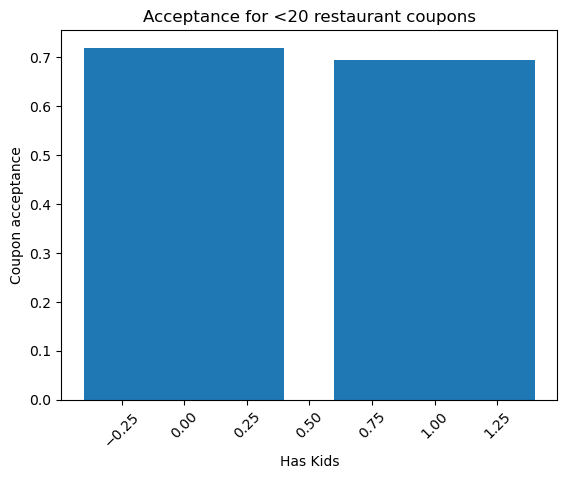

In [55]:
data_rest20_kidm = data_rest20.groupby('has_children')['Y'].mean().reset_index()
plt.bar(data_rest20_kidm['has_children'], data_rest20_kidm['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Has Kids')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

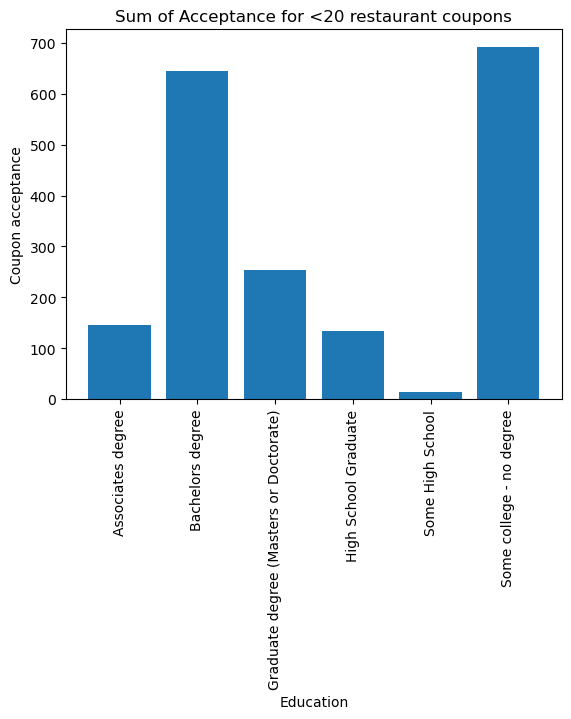

In [62]:
data_rest20_edu = data_rest20.groupby('education')['Y'].sum().reset_index()
plt.bar(data_rest20_edu['education'], data_rest20_edu['Y'])
plt.xticks(rotation = 90)
plt.xlabel('Education')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

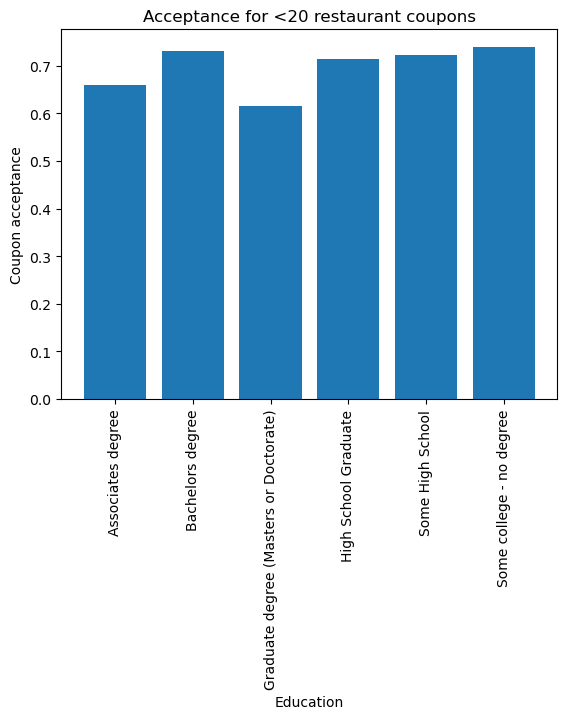

In [61]:
data_rest20_edum = data_rest20.groupby('education')['Y'].mean().reset_index()
plt.bar(data_rest20_edum['education'], data_rest20_edum['Y'])
plt.xticks(rotation = 90)
plt.xlabel('Education')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Sum of Acceptance for <20 restaurant coupons')

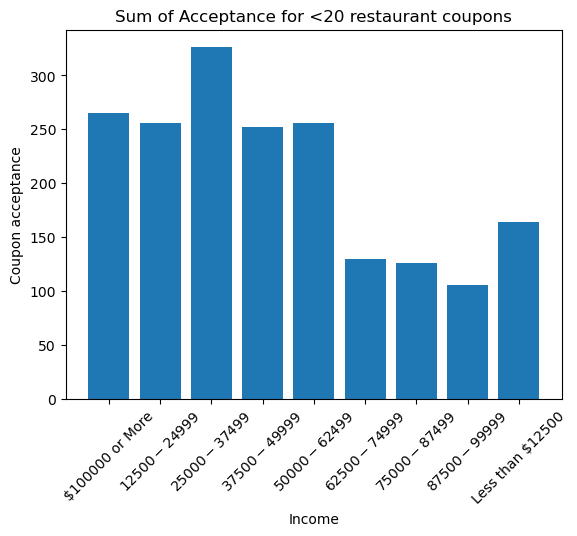

In [58]:
data_rest20_inc = data_rest20.groupby('income')['Y'].sum().reset_index()
plt.bar(data_rest20_inc['income'], data_rest20_inc['Y'])
plt.xticks(rotation = 45)
plt.xlabel('Income')
plt.ylabel('Coupon acceptance')
plt.title('Sum of Acceptance for <20 restaurant coupons')

Text(0.5, 1.0, 'Acceptance for <20 restaurant coupons')

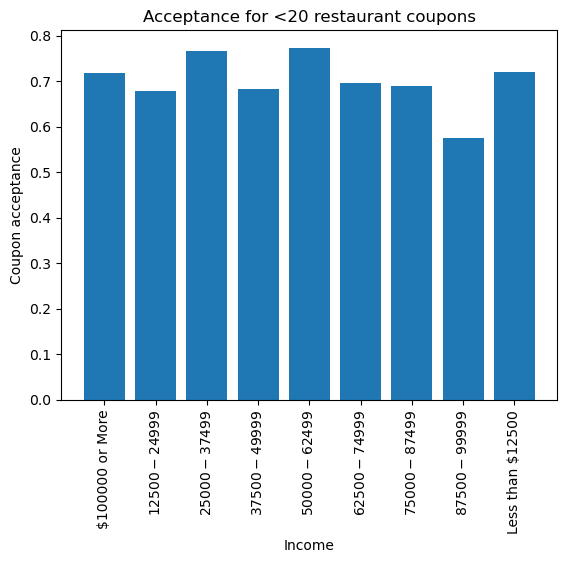

In [60]:
data_rest20_incm = data_rest20.groupby('income')['Y'].mean().reset_index()
plt.bar(data_rest20_incm['income'], data_rest20_incm['Y'])
plt.xticks(rotation = 90)
plt.xlabel('Income')
plt.ylabel('Coupon acceptance')
plt.title('Acceptance for <20 restaurant coupons')

#Summary conclusion from the additional investigation of another category as requested:
#1. People with no kids tend to demonstrate higher acceptance rate of lower priced restaurant coupons.
#2. Single or unmarried with partner tend to have higher acceptance rate.
#3. High education level (Masters or PhD) tends to show lower acceptance rate of lower priced restaurant coupons.
#4. Individuals over 50 tend to demonstrate lower interest in accepting lower priced restaurant coupons.
#5. Men tend to accept the lower priced restaurant copons more than women.
#6. 1d to expiration coupons tend to have higher acceptance rate for lower priced restaurants.
#7. Afternoons and evenings tend to have higher acceptance rate.
#8. No urgent place destination tends to correlate with high acceptance rate.